In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ianxu4113","key":"428a57a0573b02dec455214a606aa112"}'}

In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d sujaykapadnis/emotion-recognition-dataset


Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/emotion-recognition-dataset
License(s): CC-BY-NC-SA-4.0
100% 1.97G/1.98G [00:27<00:00, 49.4MB/s]
100% 1.98G/1.98G [00:28<00:00, 75.8MB/s]


In [4]:
!unzip -q emotion-recognition-dataset.zip -d dataset

In [5]:
!ls dataset/dataset

Ahegao	Angry  Happy  Neutral  Sad  Surprise


In [6]:
DATA_DIR = '../data/FacialReco/images'
RESIZE_DIR = '../data/FacialReco/resized_images'
OUTPUT_DIR = '../dataset/FacialReco'

In [7]:
from PIL import Image
import os
import numpy as np

def resize_images(input_folder, output_folder, size=(48, 48)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    subfolders = [f.path for f in os.scandir(input_folder) if f.is_dir()]
    for subfolder in subfolders:
        label = os.path.basename(subfolder)
        output_subfolder = os.path.join(output_folder, label)
        if not os.path.exists(output_subfolder):
            os.makedirs(output_subfolder)
        images = os.listdir(subfolder)
        for image_name in images:
            img_path = os.path.join(subfolder, image_name)
            output_img_path = os.path.join(output_subfolder, image_name)
            with Image.open(img_path) as img:
                img = img.resize(size, Image.ANTIALIAS)
                img.save(output_img_path)

# Apply function
resize_images('dataset/dataset', 'resized_images')
#resize_images(DATA_DIR, RESIZE_DIR)


<ipython-input-7-ca4fc8de29ba>:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(size, Image.ANTIALIAS)


In [46]:
import pandas as pd
# Emotion Categotu
dir_categories = {0: "Angry", 1: "Happy", 2: "Neutral", 3: "Sad", 4: "Surprise"}

def create_dataset(input_folder,output_folder,dir_categories):
    data = []
    for emotion_label, emotion_name in dir_categories.items():
        emotion_folder = os.path.join(input_folder, emotion_name)
        print(emotion_folder)
        if os.path.exists(emotion_folder):
            for image_file in os.listdir(emotion_folder):
                img_path = os.path.join(emotion_folder, image_file)
                with Image.open(img_path) as img:
                    img = img.convert('L')
                    img_array = np.array(img)
                    #print(img_array.shape)
                    img_array_flat = img_array.flatten()
                    data.append([emotion_label, img_array_flat])
    # Create dataframe
    df = pd.DataFrame(data, columns=['emotion', 'image'])
    csv_file_path = '/content/dataset/resizedData.csv'
    df.to_csv(csv_file_path, index=False)
    # df.to_csv(OUTPUT_DIR+ '/resizedData.csv', index=False)
    return df

input_folder = 'resized_images'
data = create_dataset(input_folder,OUTPUT_DIR, dir_categories)
# dataset = create_dataset(RESIZE_DIR, OUTPUT_DIR)
print(data.head())


resized_images/Angry
resized_images/Happy
resized_images/Neutral
resized_images/Sad
resized_images/Surprise
   emotion                                              image
0        0  [3, 3, 3, 1, 1, 3, 6, 5, 7, 5, 4, 4, 4, 4, 4, ...
1        0  [3, 0, 115, 185, 172, 165, 148, 154, 127, 132,...
2        0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3        0  [107, 108, 79, 74, 84, 105, 133, 154, 159, 162...
4        0  [33, 29, 26, 26, 28, 39, 61, 80, 91, 98, 112, ...


In [47]:
data.head()

,emotion,image
0,0,"[3, 3, 3, 1, 1, 3, 6, 5, 7, 5, 4, 4, 4, 4, 4, ..."
1,0,"[3, 0, 115, 185, 172, 165, 148, 154, 127, 132,..."
2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0,"[107, 108, 79, 74, 84, 105, 133, 154, 159, 162..."
4,0,"[33, 29, 26, 26, 28, 39, 61, 80, 91, 98, 112, ..."


In [48]:
data['emotion'].value_counts()

emotion
2    4027
3    3934
1    3740
0    1313
4    1234
Name: count, dtype: int64

In [49]:
x = data['image'][4]
x.shape

(2304,)

In [50]:
emotions_count = data['emotion'].value_counts()
emotions_count.index = emotions_count.index.map(dir_categories)
emotions_count

emotion
Neutral     4027
Sad         3934
Happy       3740
Angry       1313
Surprise    1234
Name: count, dtype: int64

In [53]:
import matplotlib.pyplot as plt

def visualize_emotions(n=4):
    i = np.random.randint(0, data.shape[0], n)
    plt.figure(figsize=(15, 15))
    for j, idx in enumerate(i):
        plt.subplot(n//4+1, 4, j+1)
        img = np.array(data['image'][idx]).astype('int').reshape(48, 48)
        plt.imshow(img, cmap='gray')
        plt.title(dir_categories[data.iloc[idx]['emotion']])
        plt.axis('off')

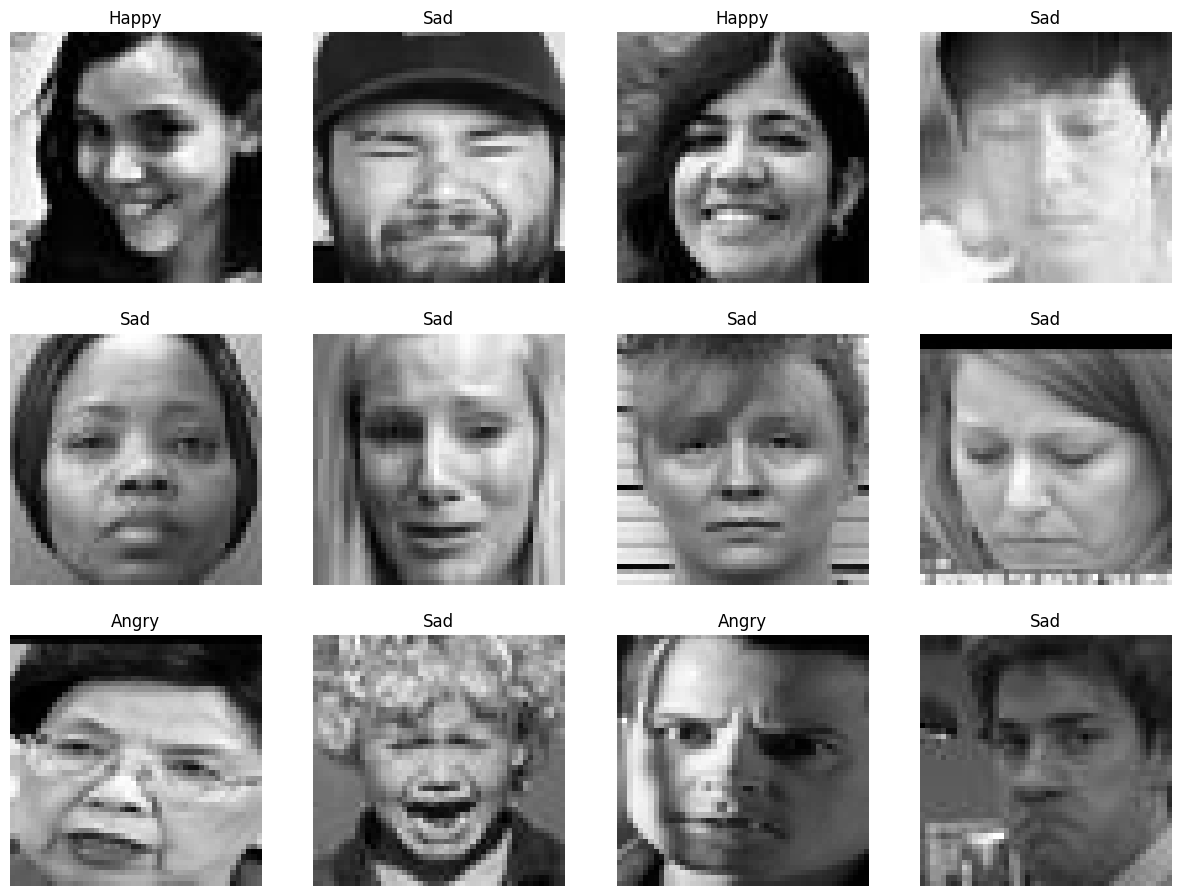

In [54]:
visualize_emotions(12)

In [55]:
def organize_data():
    train_dir = os.path.join(OUTPUT_DIR, '/train/')
    val_dir = os.path.join(OUTPUT_DIR, '/val/')
    test_dir = os.path.join(OUTPUT_DIR, '/test/')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # split data into train, val, test
    df = data.sample(frac=1).reset_index(drop=True)
    train_data = df[:int(0.7*data.shape[0])]
    val_data = df[int(0.7*data.shape[0]):int(0.85*data.shape[0])]
    test_data = df[int(0.85*data.shape[0]):]

    # save data
    train_data.to_csv(os.path.join(train_dir, 'train.csv'), index=False)
    val_data.to_csv(os.path.join(val_dir, 'val.csv'), index=False)
    test_data.to_csv(os.path.join(test_dir, 'test.csv'), index=False)

In [56]:
organize_data()